# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [3]:
import pandas as pd
df = pd.read_csv("zillow_data.csv")

# Step 2: Data Preprocessing

In [4]:
df.City.value_counts()

New York              114
Los Angeles            95
Houston                88
San Antonio            48
Washington             45
Chicago                41
Springfield            40
Austin                 40
Las Vegas              38
Philadelphia           38
Columbus               38
Phoenix                37
Kansas City            37
Dallas                 35
Portland               34
San Diego              33
Louisville             32
Oklahoma City          30
Omaha                  30
Denver                 30
Arlington              29
Jacksonville           28
San Jose               27
Richmond               27
Fort Worth             26
Indianapolis           26
Charlotte              25
Lexington              25
Lincoln                25
Madison                25
                     ... 
Farley                  1
Shoals                  1
Trafalgar               1
Byesville               1
Pen Argyl               1
Blue River              1
Knox                    1
Middle Islan

# Step 3: Reshape from Wide to Long Format

In [5]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName', 'RegionID', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [6]:
def make_df(df, city):
    """
    Formats dates, values, and index from selected city into a usable DF
    """
    df = df[df['City']==city]
    df = melt_data(df)
    df.set_index('time', inplace=True)
    return df

In [7]:
# Creating dictionaries of DFs for the top 5 cities
cities = {i: make_df(df, i) for i in df.City.value_counts()[:5].index}

In [8]:
ny_df = cities['New York']

# Step 4: EDA and Visualization
Perform basic EDA as you would building any model, then create at least 3 visualizations.  At least one of the visualizations should have time on the x-axis.  Axes should be labeled and any text should be legible.

In [9]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

# matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [10]:
def city_months(df):
    """
    Returns the mean of each month
    """
    df = df.resample("MS").mean()
    return df

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

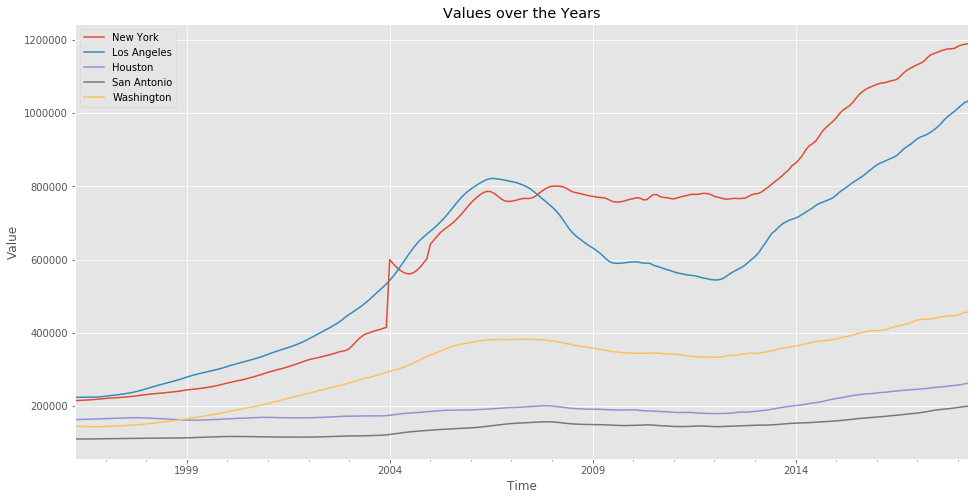

In [12]:
plt.figure(figsize=(16,8))

# Iterate through the dictionary's keys, find their mean then plot it
for i in cities.keys():
    city_months(cities[i]).value.plot(label=i)
    
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.title("Values over the Years")
plt.show()


#### Narrowed the city choice for housing investment to be in New York based on it's value growth over the years compared to others

In [28]:
nydf = df[df['City']=='New York']
nydf.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
10,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200
12,62087,11375,New York,NY,New York,Queens,13,252400.0,251800.0,251400.0,...,1022600,1033700,1048600,1066400,1081200,1088800,1092700,1089500,1084000,1084600
13,62045,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,...,767300,777300,788800,793900,796000,799700,806600,810600,813400,816200
20,61625,10011,New York,NY,New York,New York,21,NaN,NaN,NaN,...,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300


In [36]:
# Calculating Return on Investment in New York
nydf['ROI']  = (nydf['2018-04']-nydf['1996-04'])/nydf['1996-04']

# Calculating the mean, standard deviation, and coefficient of variation
nydf['std']  = nydf.loc[:, '1996-04':'2018-04'].std(skipna=True, axis=1)
nydf['mean'] = nydf.loc[:, '1996-04':'2018-04'].mean(skipna=True, axis=1)
nydf['cv']   = nydf['std']/nydf['mean']

nystats = nydf[['RegionName', 'std', 'mean', 'cv', 'ROI']]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

#### Coefficient of Variation (CV) is a measure used to assess the total risk per unit of return of an investment.
New York's relatively low CV is telling us that houses and investments made are low risk.

In [37]:
nystats.describe()

,RegionName,std,mean,cv,ROI
count,114.000000,1.140000e+02,1.140000e+02,114.000000,104.000000
mean,11071.078947,2.504634e+05,7.484970e+05,0.346843,3.100449
std,447.827502,4.455419e+05,1.539127e+06,0.084708,1.752034
min,10011.000000,3.704088e+04,2.465381e+05,0.118319,1.009030
25%,10605.750000,1.000458e+05,3.251207e+05,0.303499,2.115401
50%,11228.500000,1.520992e+05,4.339398e+05,0.332582,2.608544
75%,11376.500000,2.027304e+05,5.413195e+05,0.368275,3.316914
max,11694.000000,3.361064e+06,1.285427e+07,0.697541,11.189940


In [61]:
ny_cv = nydf.cv.quantile(q=.50)
print(f"CV Upper Limit: {ny_cv}")

CV Upper Limit: 0.3325819627962022


##### Selecting the best ROI based on the top 50% quantile of cv (risk).
These houses have less risk than the other 50% and sorted them by their ROI for optimal return vs risk.

In [96]:
# Determining which houses have the best ROI within the quantile range
nycv_top = nydf[nydf['cv']<ny_cv].sort_values(by='ROI', ascending=False)[:5]
nycv_top[['RegionName', 'City', 'State', 'cv', 'ROI']]

,RegionName,City,State,cv,ROI
8303,11366,New York,NY,0.327260,2.855047
4697,10471,New York,NY,0.319429,2.662158
7066,11362,New York,NY,0.307567,2.628046
2845,11364,New York,NY,0.326973,2.612745
2497,11357,New York,NY,0.317272,2.604343


In [97]:
# Removing columns
nycv_top = nycv_top.drop(['City', 'State', 'Metro', 'CountyName', 'RegionID', 'SizeRank',  'cv', 'ROI', 'std','mean'], axis=1)

In [98]:
# Altered melt_data function for the new zip codes
def melt_data_cv(df):
    melted = pd.melt(df, id_vars=['RegionName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    melted = melted.set_index('time')
    return melted

In [99]:
z_codes = melt_data_cv(nycv_top)

In [112]:
# Storing the selected zip codes into a dictionary of DFs
z_c = {str(i): z_codes[z_codes['RegionName']==i] for i in z_codes.RegionName.unique()}

In [116]:
z_c['10471'].head()

,RegionName,value
time,,
1996-04-01,10471,317900.0
1996-05-01,10471,321900.0
1996-06-01,10471,325600.0
1996-07-01,10471,328800.0
1996-08-01,10471,331500.0


##### Statistics for the zip codes

In [125]:
for i in z_c.keys():
    print(f"\nValue Descriptive Stats for Zip Code: {i}")
    print(z_c[i].describe())


Value Descriptive Stats for Zip Code: 11366
       RegionName          value
count       265.0     265.000000
mean      11366.0  542226.415094
std           0.0  177449.163816
min       11366.0  231800.000000
25%       11366.0  385300.000000
50%       11366.0  591100.000000
75%       11366.0  656400.000000
max       11366.0  893600.000000

Value Descriptive Stats for Zip Code: 10471
       RegionName         value
count       265.0  2.650000e+02
mean      10471.0  7.664868e+05
std           0.0  2.448381e+05
min       10471.0  3.179000e+05
25%       10471.0  5.593000e+05
50%       10471.0  8.149000e+05
75%       10471.0  9.464000e+05
max       10471.0  1.164200e+06

Value Descriptive Stats for Zip Code: 11362
       RegionName          value
count       265.0     265.000000
mean      11362.0  615289.811321
std           0.0  189242.956941
min       11362.0  266700.000000
25%       11362.0  458100.000000
50%       11362.0  679700.000000
75%       11362.0  738800.000000
max       11362.

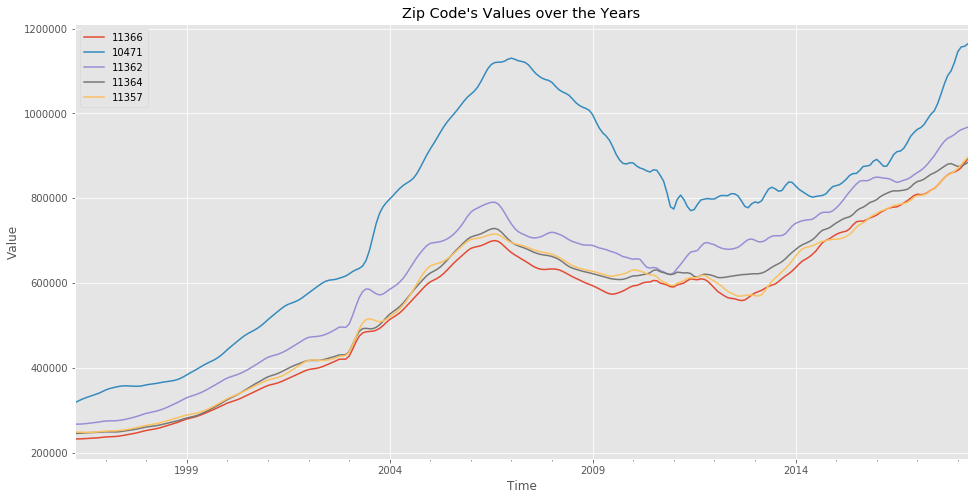

In [127]:
plt.figure(figsize=(16,8))

# Iterate through the zip code dictionary's keys
for i in z_c.keys():
    z_c[i].value.plot(label=i)
    
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.title("Zip Code's Values over the Years")
plt.show()

Zip Code: 10471, located in the Bronx, showed dramatic increase over the years but was affected drastically in the Housing Market Crash of 2008-2009

In [193]:
def create_returns(df):
    """
    Calculates returns by subtracting the previous month's value from the current month
    """
    lst = []
    for i in range(len(df)):
        if i == 0:
            lst.append(0)
        else:
            lst.append(df.value[i] - df.value[i-1])
        
    df['returns'] = lst
    return

In [194]:
# Applying the function to our dictionary of DFs
for i in z_c.keys():
    create_returns(z_c[i])

#### Visualizing the returns for each zip code's house values

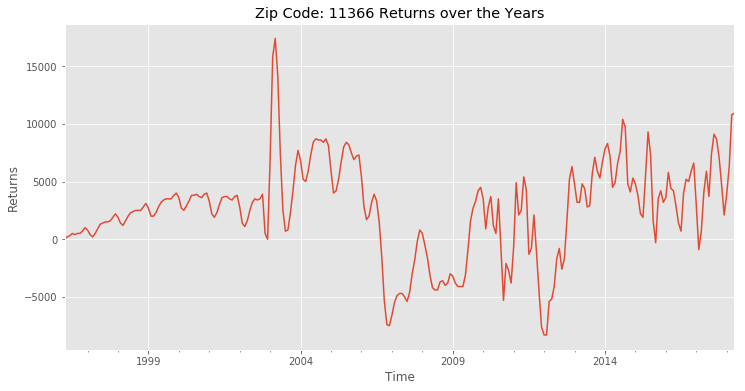

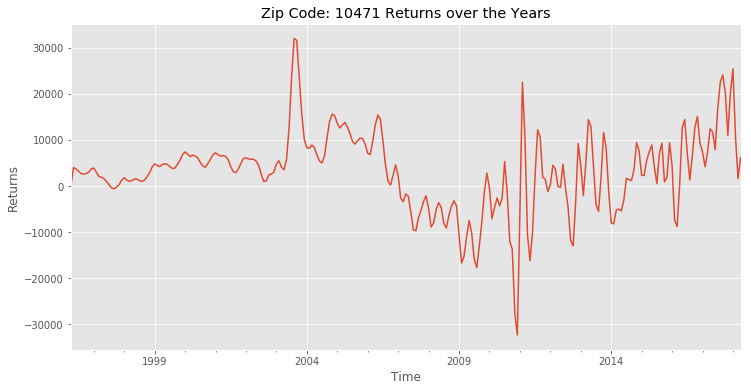

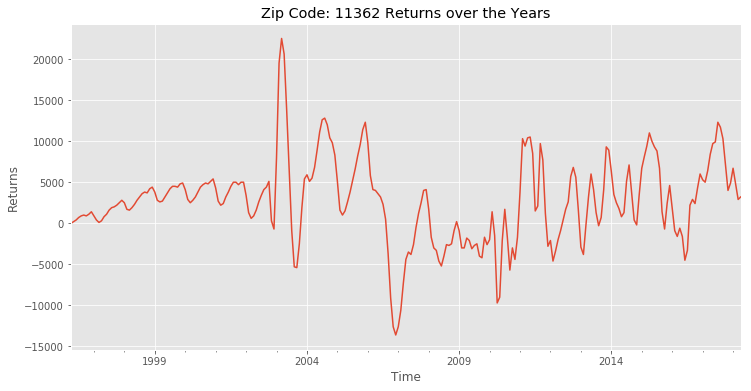

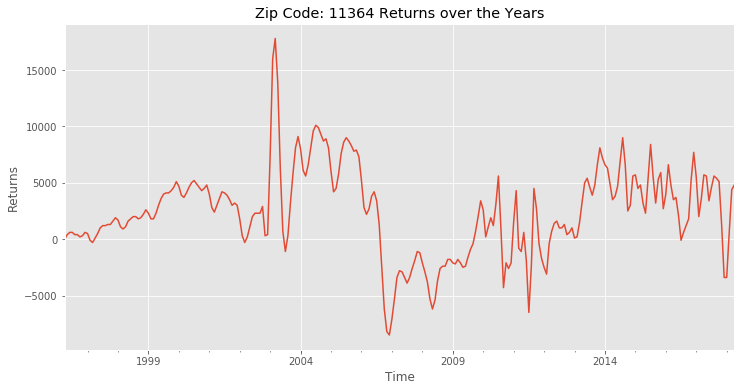

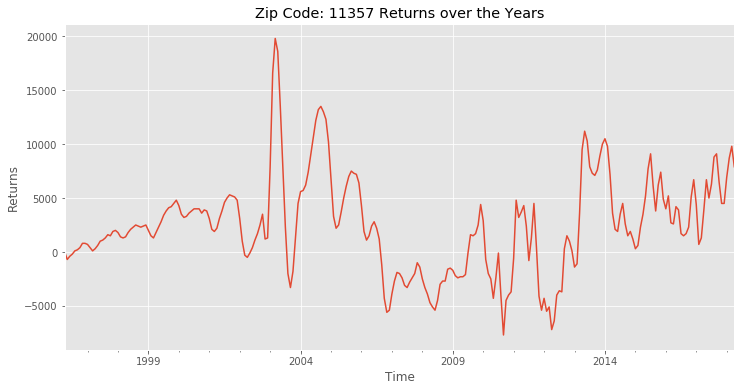

In [195]:
# Iterate through the zip code dictionary's keys
for i in z_c.keys():
    plt.figure(figsize=(12,6))
    z_c[i].returns.plot()
    plt.xlabel("Time")
    plt.ylabel("Returns")
    plt.title(f"Zip Code: {i} Returns over the Years")
    plt.show()

#### Visualizing Rolling Mean and Rolling Standard Deviation

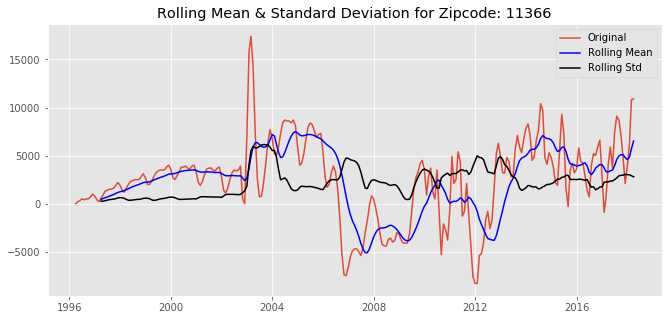

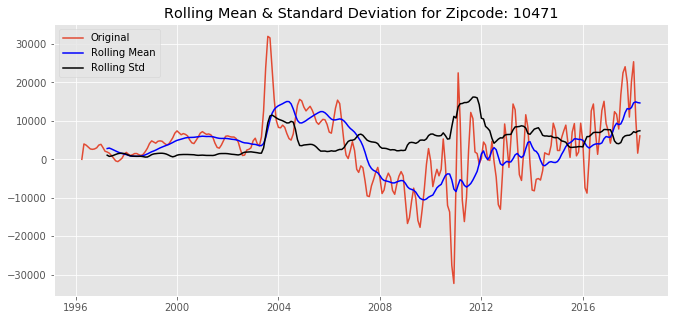

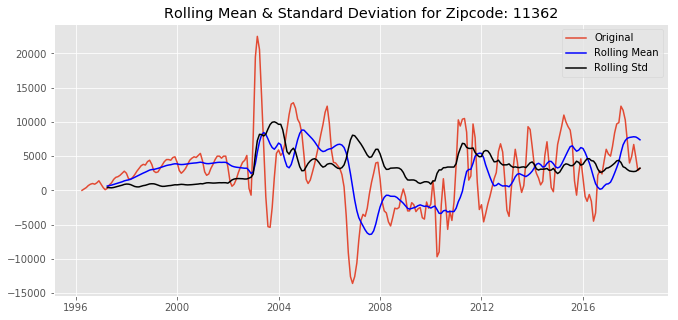

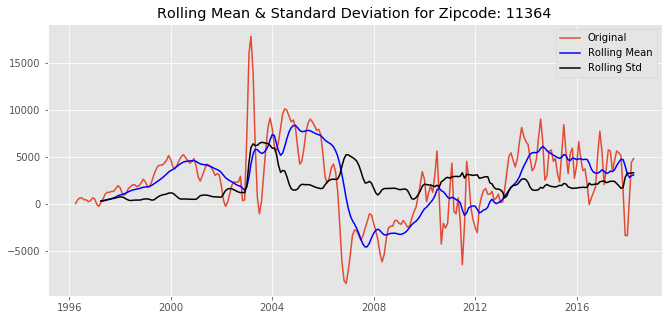

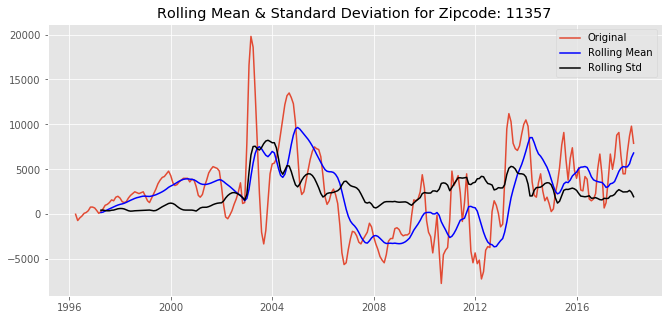

In [196]:
#Plot each of the zipcodes' returns with their respective rolling mean and rolling standard deviation.
#Vizually test for stationarity.
for i in z_c.keys():
    # 13 was chosen because it is part of the Fibonacci sequence
    rolmean = z_c[i].returns.rolling(window = 13, center = False).mean()
    rolstd = z_c[i].returns.rolling(window = 13, center = False).std()
    fig = plt.figure(figsize=(11,5))
    orig = plt.plot(z_c[i].returns, label='Original')
    mean = plt.plot(rolmean, color='blue', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title(f'Rolling Mean & Standard Deviation for Zipcode: {i}')
    plt.show()

In [199]:
from statsmodels.tsa.stattools import adfuller

# Testing for stationarity
for i in z_c.keys():
    results = adfuller(z_c[i].returns)
    
    print(f"\nADFuller test p-value for zipcode: {i}")
    print(f"p-value: ", results[1])
    
    if results[1] >= .05:
        print("Fail to reject the null. Not stationary")
    elif results[1] < .05:
        print("Reject the null. It is stationary")


ADFuller test p-value for zipcode: 11366
p-value:  0.31097345080689504
Fail to reject the null. Not stationary

ADFuller test p-value for zipcode: 10471
p-value:  0.45405108851434695
Fail to reject the null. Not stationary

ADFuller test p-value for zipcode: 11362
p-value:  0.1589757910361212
Fail to reject the null. Not stationary

ADFuller test p-value for zipcode: 11364
p-value:  0.17355856641474665
Fail to reject the null. Not stationary

ADFuller test p-value for zipcode: 11357
p-value:  0.277118089557163
Fail to reject the null. Not stationary


In [201]:
# Finding the difference and dropping nan to create stationarity
for i in z_c.keys():
    results = adfuller(z_c[i].returns.diff().dropna())
    
    print(f"\nADFuller test p-value for zipcode: {i}")
    print(f"p-value: ", results[1])
    
    if results[1] >= .05:
        print("Fail to reject the null. Not stationary")
    elif results[1] < .05:
        print("Reject the null. It is stationary")


ADFuller test p-value for zipcode: 11366
p-value:  7.360903388215515e-08
Reject the null. It is stationary

ADFuller test p-value for zipcode: 10471
p-value:  4.657994452008799e-11
Reject the null. It is stationary

ADFuller test p-value for zipcode: 11362
p-value:  1.239052024134186e-10
Reject the null. It is stationary

ADFuller test p-value for zipcode: 11364
p-value:  7.904353788036354e-06
Reject the null. It is stationary

ADFuller test p-value for zipcode: 11357
p-value:  8.10485429226104e-13
Reject the null. It is stationary


In [208]:
# Creating a dictionary containing the difference
diff = {i: z_c[i].returns.diff().dropna() for i in z_c.keys()}

In [224]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def acf_pacf(df,alags=50,plags=50):
    """
    Graphing the PACF and ACF of a DF
    """
    #Create figure
    fig,(ax1,ax2) = plt.subplots(2,1,figsize=(13,8))
    #Make ACF plot
    plot_acf(df,lags=alags, zero=False,ax=ax1)
    #Make PACF plot
    plot_pacf(df,lags=plags, ax=ax2)
    plt.show()

----------PACF and ACF for 11366------------


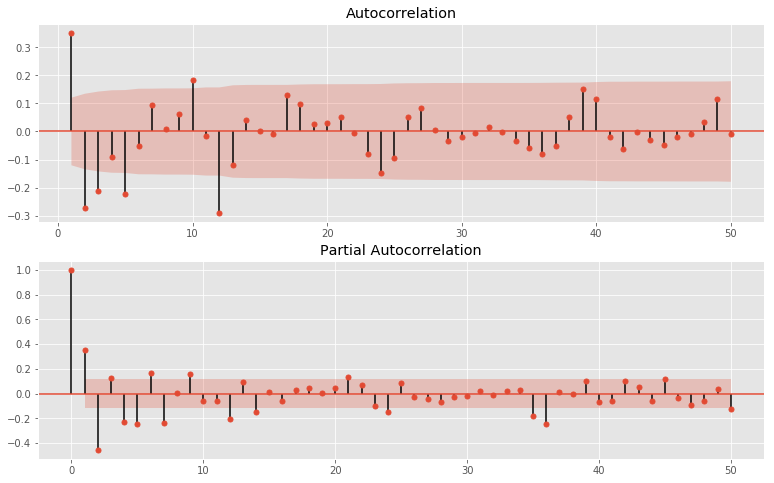

----------PACF and ACF for 10471------------


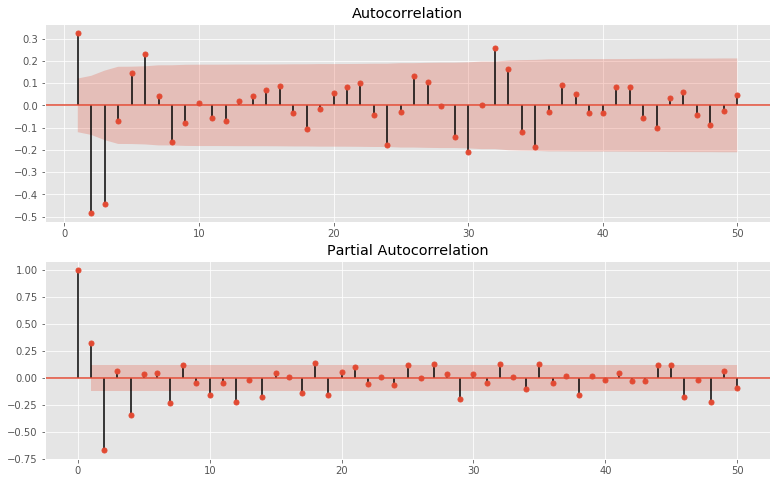

----------PACF and ACF for 11362------------


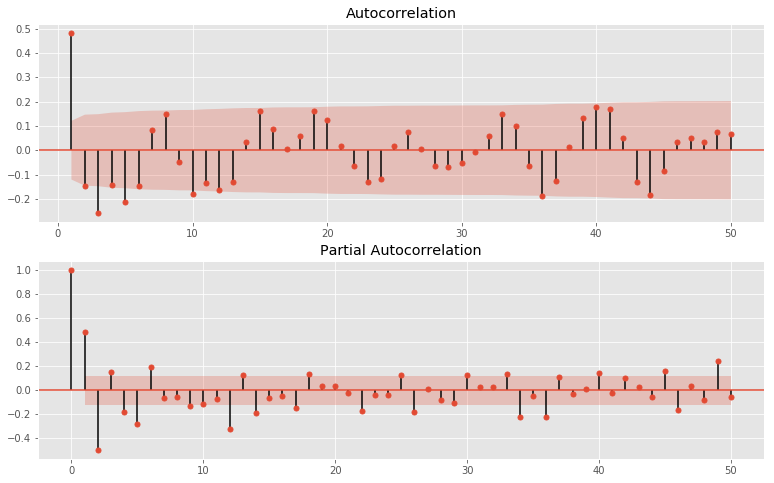

----------PACF and ACF for 11364------------


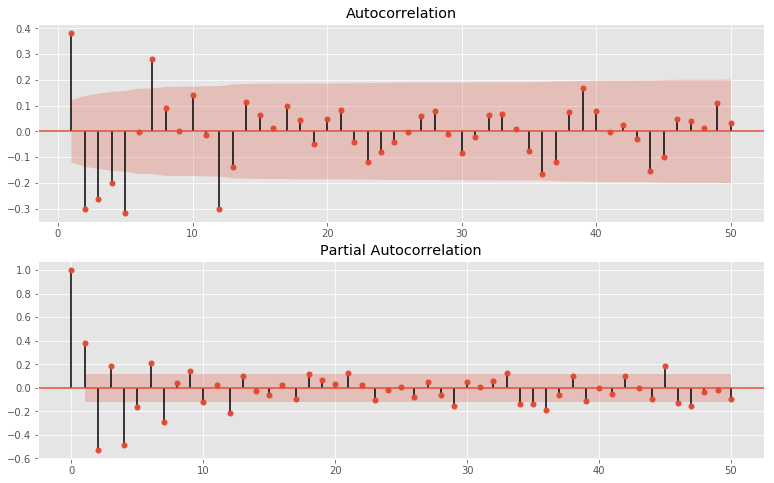

----------PACF and ACF for 11357------------


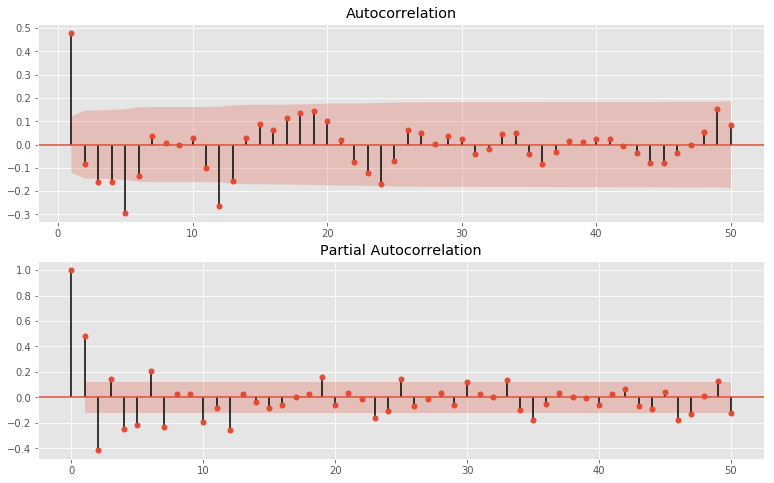

In [225]:
for i in diff.keys():
    print(f"----------PACF and ACF for {i}------------")
    acf_pacf(diff[i])

# Step 5: ARIMA Modeling
Be sure to validate your model.  Make a forecast for the future and describe the trend.

In [221]:
import pmdarima as pm

#Use auto arima function to find the best non-seasonal and seasonal parameters to fit the model.
results = pm.auto_arima(diff['11366'],information_criterion='aic',m=12,d=0,
                        start_p=1,start_q=1, max_p=3, max_q=3,
                        stepwise=True,trace=True,error_action='ignore',suppress_warnings=True)
results

Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 1, 12); AIC=4561.477, BIC=4582.933, Fit time=0.802 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=4724.076, BIC=4731.228, Fit time=0.012 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 12); AIC=4664.042, BIC=4678.346, Fit time=0.369 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 12); AIC=4565.680, BIC=4579.984, Fit time=0.350 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 1, 12); AIC=4567.536, BIC=4585.415, Fit time=0.497 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 0, 1, 12); AIC=4562.969, BIC=4588.001, Fit time=1.703 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 0, 12); AIC=4617.379, BIC=4635.258, Fit time=0.453 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 2, 12); AIC=4561.967, BIC=4586.998, Fit time=1.600 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 12); AIC=4649.301, BIC=4663.604, Fit time=0.048 seconds
Fit ARIMA: order=(1, 0, 1) s

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 0, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(1, 0, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [232]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


def model_fit(df,pdq=(1,0,1),pdqs=(0,0,0,1)):
    train, test = train_test(df)
    model = SARIMAX(train,order=pdq,seasonal_order=pdqs)
    results = model.fit()
    results.summary
    residuals = results.resid
    print(results.summary())
    results.plot_diagnostics(figsize=(11,8))
    plt.show();
    return train, test, results

In [233]:
def train_test(df):
    #Set training dsata before 2016
    train = df[:'2015-04']
    #Set test data starting 2016
    test = df['2015-05':]
    return train, test

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


                                 Statespace Model Results                                 
Dep. Variable:                            returns   No. Observations:                  228
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 12)   Log Likelihood               -1945.103
Date:                            Thu, 05 Sep 2019   AIC                           3898.205
Time:                                    16:07:35   BIC                           3911.922
Sample:                                05-01-1996   HQIC                          3903.740
                                     - 04-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0409      0.063      0.649      0.517      -0.083       0.165
ma.L1          0.6380      0.053   

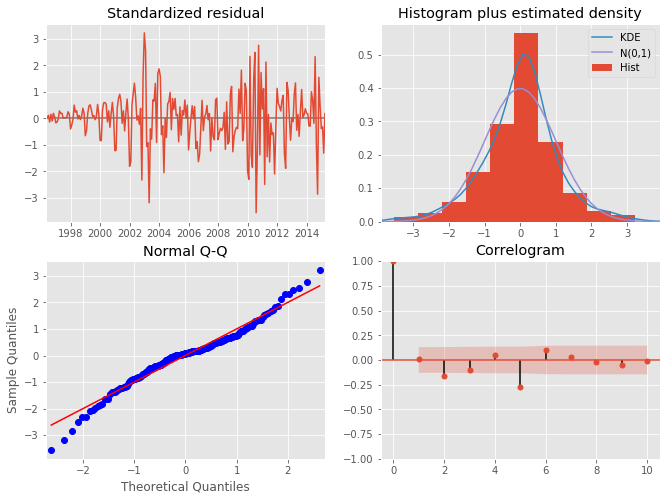

In [234]:
pdq = (1,0,1)
pdqs = (0,0,1,12)
train, test, results = model_fit(diff['11366'],pdq=pdq,pdqs=pdqs)

In [243]:
from sklearn.metrics import mean_squared_error as MSE

def train_RMSE(train, results, display = True):
    train_pred = results.predict(-36)
    rmse = MSE(train[-36:],train_pred) ** .5
    print(f'SARIMA model RMSE on train data: %.5f' % rmse)
    if display:
        plt.figure(figsize=(13,6))
        train[-60:].plot(label='Actual',color='b')
        train_pred.plot(label='Predicted',color='r')
        plt.legend(loc='best')
        plt.title('Actual Train Data vs. Predicted Returns')
        plt.show()

SARIMA model RMSE on train data: 1159.61413


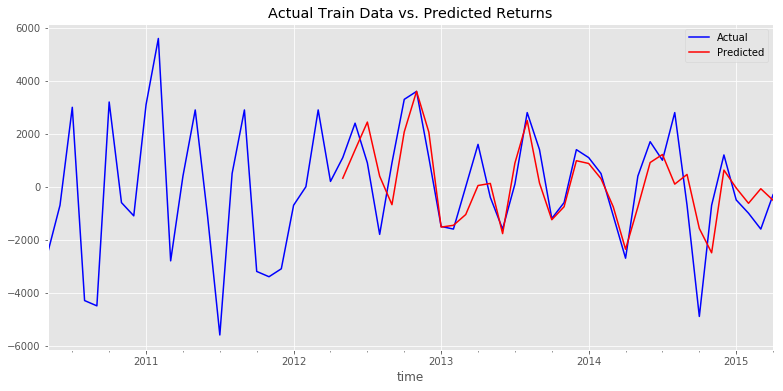

In [244]:
train_RMSE(train, results)

In [246]:
def test_RMSE(df,pdq=(1,0,1),pdqs=(0,0,0,1), display=True):
    X = df.values
    train, test = X[:-36],X[-36:]
    history = [x for x in train]
    predictions = []
    for t in range(len(test)):
        model = SARIMAX(history, order=pdq,seasonal_order=pdqs)
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse = MSE(test, predictions) ** .5
    print('SARIMA model RMSE on test data: %.5f' % rmse)
    if display:
        plt.figure(figsize=(13,6))
        plt.title('Actual Test Data vs. Predictions')
        plt.plot(history[-36:],label='Actual', color='b')
        plt.plot(predictions,label='Predictions',color='r')
        plt.legend(loc='best')
        plt.show()

SARIMA model RMSE on test data: 2329.49162


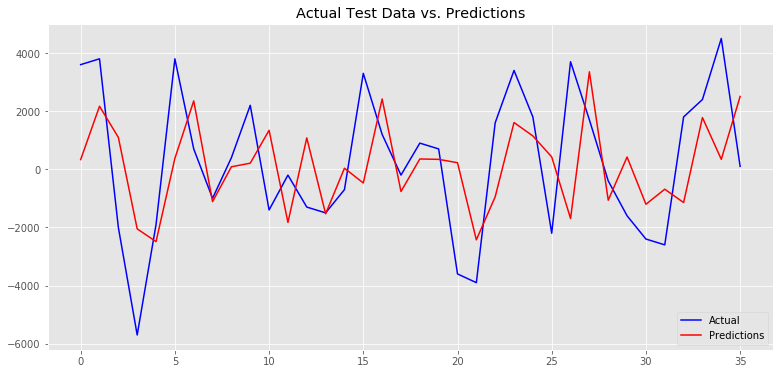

In [247]:
test_RMSE(diff['11366'])

In [251]:
def forecast_model(df,pdq=(1,0,1),pdqs=(0,0,0,1), display=True,zc='input zipcode'):
    model = SARIMAX(df, order=pdq,seasonal_order=pdqs)
    model_fit = model.fit()
    output = model_fit.get_prediction(start='2018-04',end='2028-04', dynamic=True)
    forecast_ci = output.conf_int()
    if display:
        fig, ax = plt.subplots(figsize=(13,6))
        output.predicted_mean.plot(label='Forecast')
        ax.fill_between(forecast_ci.index,forecast_ci.iloc[:, 0],forecast_ci.iloc[:, 1],
                        color='k', alpha=.25,label='Conf Interval')
        plt.title('Forecast of Monthly Returns')
        plt.xlabel('Time')
        plt.legend(loc='best')
        plt.show()
    year_1= (1+output.predicted_mean[:12]).prod()-1
    year_3=(1+output.predicted_mean[:36]).prod()-1
    year_5= (1+output.predicted_mean[:60]).prod()-1
    year_10=(1+output.predicted_mean).prod()-1
    print(f'Total expected return in 1 year: {round(year_1,2)}%')
    print(f'Total expected return in 3 years: {round(year_3,2)}%')
    print(f'Total expected return in 5 year: {round(year_5,2)}%')
    print(f'Total expected return in 10 years: {round(year_10,2)}%')
    tot_ret = [zc,year_1,year_3,year_5,year_10]
    return tot_ret

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


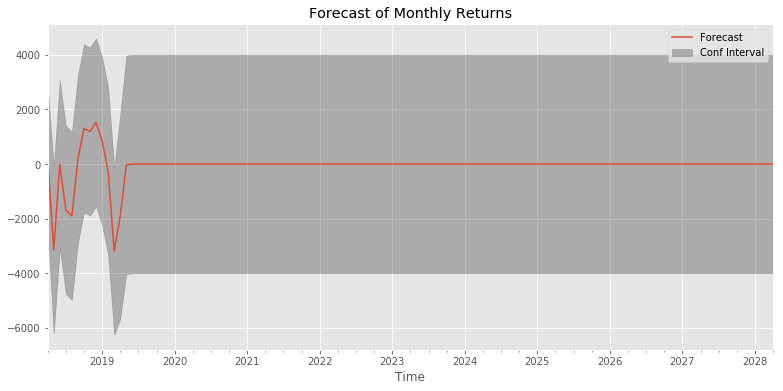

Total expected return in 1 year: 1.064401858762348e+34%
Total expected return in 3 years: 1.9354764897760247e+38%
Total expected return in 5 year: 1.9354764897760247e+38%
Total expected return in 10 years: 1.9354764897760247e+38%


In [253]:
ret_11366=forecast_model(diff['11366'],pdq=pdq,pdqs=pdqs,zc=11366)

# Step 6: Interpreting Results
Give a detailed interpretation of results including the relationship between the inputs and output of the model.